The date is 2nd June 2019.
<br>
Today, we will analyse my Twitter timeline.
<br>
Let's start by loading the required modules.

In [1]:
import tweepy
import pandas as pd
import json

tweepy is an API that lets python communicate with Twitter.
<br>
We use pandas to tabulate our data which makes it easier to work with.
<br>
The json module is required as our credentials required to access the Twitter API is saved in a file called twitter_credentials.json. We'll load the keys as shown below.

In [2]:
# Getting credentials
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

Now using these credentials, we can access the Twitter API. (Note, each Twitter Developer user will have their own keys to access the API.)

In [3]:
# Accessing the API
auth = tweepy.OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
auth.set_access_token(creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
api = tweepy.API(auth)

Now the api variable is a tweepy.api.API object which can be used to perform different tasks.
<br>
We'll now search the timeline and save these tweets in a pandas DataFrame.

In [5]:
# Searching tweets
tweets = []
hashtags = []
varTimeline = api.home_timeline(count = 200, tweet_mode = 'extended')
for tweet in varTimeline:
    if(len(tweet.entities['hashtags']) > 0):
        hashtags.append(tweet.entities['hashtags'][0]['text'])
    tweets.append(tweet.full_text)
tweetFrame = pd.DataFrame(tweets)
tweetFrame.rename(index = str, columns = {0: 'Tweets'}, inplace = True)

Let us see the number of tweets we've received.

In [9]:
tweetFrame.count()

Tweets    189
dtype: int64

Let's take a look at a few of the tweets.

In [11]:
tweetFrame.tail(5)

,Tweets
184,It was a glorious night in Madrid for @LFC... ...
185,Accomplished women are making a mark in sports...
186,This ought to be a very big sigh of relief! ht...
187,🇪🇬👑 Salah at Liverpool 😎\n\n⚽️7⃣1⃣ 👕1⃣0⃣4⃣\n\n...
188,Week-in-Review: Apple’s shipping a refresh for...


Now we need to clean our tweets to remove the hashtags, retweets and usernames.
<br>
We'll also use a function to decontract tweets as much as possible to help with the analysis.

In [12]:
# Function to convert contractions to its longer form
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

Now we can begin cleaning the tweets.

In [13]:
# Cleaning tweets using regex
import re

clean_tweets = []
for index, row in tweetFrame.iterrows():
    clean_tweet = decontracted(row['Tweets'])
    regex = 'RT'
    clean_tweet = re.sub(regex, ' ', clean_tweet)
    regex = "(@_\w+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"
    clean_tweet = re.sub(regex, ' ', clean_tweet)
    regex = 'https://t.co/Uuy0zOBCim'
    clean_tweet = re.sub(regex, '', clean_tweet)
    clean_tweet = re.sub('^\s*', '', clean_tweet)
    clean_tweets.append(clean_tweet)
    
cleanTweetFrame = pd.DataFrame(clean_tweets)
cleanTweetFrame.rename(index = str, columns = {0: 'Tweets'}, inplace = True)

Now that the cleaned tweets are stored in the new DataFrame, we can begin our analysis.

Let us first check the most trending hastag on my timeline.

In [19]:
# Analysing tweets  
from collections import Counter
counter_hashtags = Counter(hashtags)  
hashtag_count = pd.DataFrame(counter_hashtags.most_common(20))
hashtag_count.rename(index = str, columns = {0: 'Hashtag', 1: 'Frequency'}, inplace = True)
print(hashtag_count.to_string(index = False))

        Hashtag  Frequency
       UCLfinal         13
     Bangladesh          2
        HeroISL          2
    BackTheBlue          2
       UCLFinal          2
      Telangana          2
 IndianFootball          2
         SAvBAN          2
           COYH          2
          CWC19          2
             PL          1
        Madonna          1
     BlueTigers          1
      Vaporwave          1
       KingsCup          1
     GovBallNYC          1
     WestBengal          1
       WeAreBFC          1
      KatyPerry          1
   GoalOfTheDay          1


As you can see, the most prominent hashtag is about the UCL finals.
<br>
The cricket world cup and Indian football have decent presence too.

Now let us analyse how friendly/positive the tweets on my timeline are.
<br>
For this we'll use TextBlob and its sentiment analyser.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a221435f8>]],
      dtype=object)

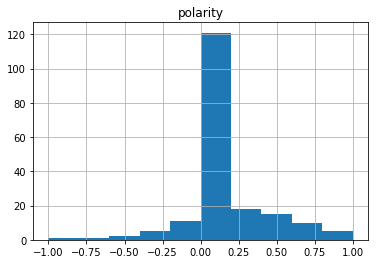

In [21]:
from textblob import TextBlob
import matplotlib.pyplot as plt
pos = 0
neg = 0    
neu = 0
sentiList = []
for index, row in cleanTweetFrame.iterrows():
    tweet = row['Tweets']
    analysis = TextBlob(tweet)
    sentiList.append(analysis.sentiment)
    if(analysis.sentiment[0] > 0):
        pos += 1
    elif(analysis.sentiment[0] < 0):
        neg += 1
    else:
        neu += 1
sentiFrame = pd.DataFrame(sentiList)
sentiFrame.hist(column = 'polarity')

As you can see, most of the tweets are either neutral or positive.
<br>
Let us crunch these numbers a bit more.

In [22]:
print(f"Positive tweets: {pos} | Negative tweets: {neg} | Neutral Tweets: {neu}")
total = pos + neg + neu
print(f"Percentage of Positive tweets: {(pos/total)*100}%")
print(f"Percentage of Negative tweets: {(neg/total)*100}%")
print(f"Percentage of neutral tweets: {(neu/total)*100}%")

Positive tweets: 82 | Negative tweets: 20 | Neutral Tweets: 87
Percentage of Positive tweets: 43.386243386243386%
Percentage of Negative tweets: 10.582010582010582%
Percentage of neutral tweets: 46.03174603174603%


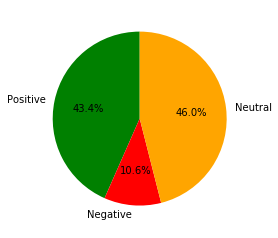

In [24]:
plt.pie([pos, neg, neu], labels=['Positive', 'Negative', 'Neutral'], colors=['Green', 'Red', 'Orange'], startangle=90, autopct='%.1f%%')
plt.show()

My final conclusion:
I'm lucky to not have my timeline filled with negativity.